# Tarea DDDM - Pregunta 2

#### Juan José Balsa, Enrique Celedón, Gustavo Hernández

 Cargamos el dataset desde Excel local

In [1]:
library(readxl)

In [2]:
eCar_df <- read_excel("C:/Users/EnriqueCeledónV/OneDrive - Locke/Documentos/U Chile - MIT/Módulo 3 - Data Driven Decision Making/Tarea Marcelo Olivares/datos_tarea_final_DDDM/datos P2/e_Car_Data_extract_forClass.xlsx")

In [3]:
head(eCar_df)

Tier,FICO,Approve Date,Term,Amount,Previous APR,Car Type,Competition APR,Accept,APR,Prime,Partner Bin
2,702,2002-07-02,60,22000.00,NA,U,5.85,0,6.19,1.8388,3
2,710,2002-07-03,60,21000.00,NA,U,5.85,0,6.19,1.8388,1
3,693,2002-07-06,60,19597.95,NA,U,5.85,1,7.29,1.8400,1
3,696,2002-07-06,60,23071.00,NA,U,5.85,0,7.29,1.8400,3
3,697,2002-07-08,60,21577.70,NA,U,5.80,1,7.29,1.8400,2
2,702,2002-07-08,60,20211.04,NA,U,5.80,1,6.19,1.8400,2


Revisamos la estructura del dataframe

In [4]:
str(eCar_df)


Classes 'tbl_df', 'tbl' and 'data.frame':	1540 obs. of  12 variables:
 $ Tier           : num  2 2 3 3 3 2 2 3 3 2 ...
 $ FICO           : num  702 710 693 696 697 702 709 690 684 706 ...
 $ Approve Date   : POSIXct, format: "2002-07-02" "2002-07-03" ...
 $ Term           : num  60 60 60 60 60 60 60 60 60 60 ...
 $ Amount         : num  22000 21000 19598 23071 21578 ...
 $ Previous APR   : logi  NA NA NA NA NA NA ...
 $ Car  Type      : chr  "U" "U" "U" "U" ...
 $ Competition APR: num  5.85 5.85 5.85 5.85 5.8 5.8 5.8 5.8 5.8 5.8 ...
 $ Accept         : num  0 0 1 0 1 1 1 0 1 0 ...
 $ APR            : num  6.19 6.19 7.29 7.29 7.29 6.19 6.19 7.29 7.29 6.19 ...
 $ Prime          : num  1.84 1.84 1.84 1.84 1.84 ...
 $ Partner Bin    : num  3 1 1 3 2 2 1 1 3 1 ...


Revisamos indicadores estadísticos generales de los atributos

In [5]:
summary(eCar_df)

      Tier            FICO        Approve Date                      Term   
 Min.   :1.000   Min.   :684.0   Min.   :2002-07-02 00:00:00   Min.   :60  
 1st Qu.:2.000   1st Qu.:691.0   1st Qu.:2003-10-26 12:00:00   1st Qu.:60  
 Median :3.000   Median :698.0   Median :2004-04-12 00:00:00   Median :60  
 Mean   :2.469   Mean   :698.1   Mean   :2004-02-11 13:11:03   Mean   :60  
 3rd Qu.:3.000   3rd Qu.:705.0   3rd Qu.:2004-08-16 00:00:00   3rd Qu.:60  
 Max.   :4.000   Max.   :712.0   Max.   :2004-11-16 00:00:00   Max.   :60  
     Amount      Previous APR    Car  Type         Competition APR
 Min.   :17808   Mode:logical   Length:1540        Min.   :4.090  
 1st Qu.:20000   NA's:1540      Class :character   1st Qu.:4.650  
 Median :21838                  Mode  :character   Median :4.790  
 Mean   :21737                                     Mean   :4.854  
 3rd Qu.:24000                                     3rd Qu.:5.050  
 Max.   :25000                                     Max.   :5.850  

Usamos la función attach para poder acceder variables del dataframe sin llamar al dataframe

In [6]:
attach(eCar_df)

Graficamos la tasa de interés APR contra aceptación de la tasa por el cliente

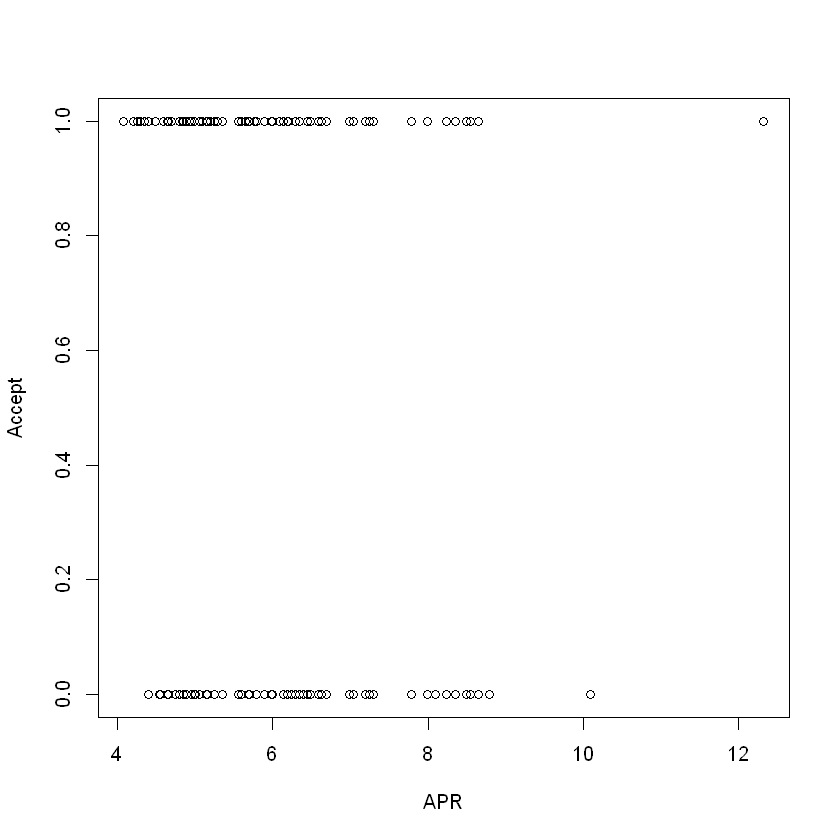

In [7]:
plot(APR, Accept)

Eliminamos outliers APR>=10

In [8]:
eCar_df = subset(eCar_df,APR<10)

Ploteamos FICO/APR coloreando por Accept para tener una idea del comportamiento de aceptación según FICO y APR

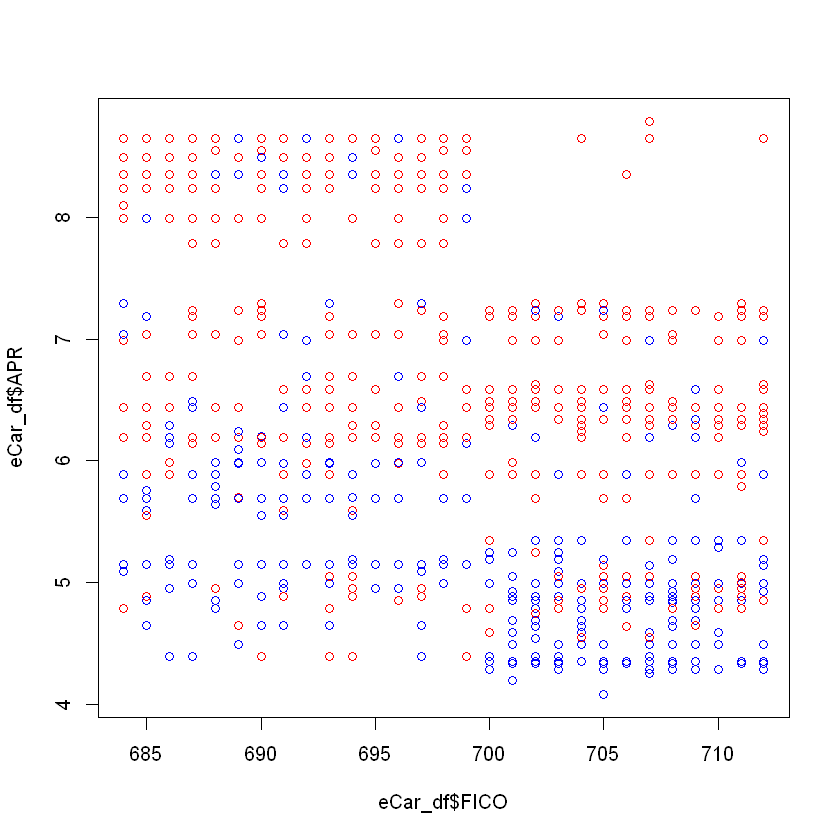

In [9]:
plot(eCar_df$FICO, eCar_df$APR, col= ifelse(Accept >0,"blue","red"))

In [10]:
#install.packages('gplots')
library(gplots)


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



Redondeamos la tasa al 0.5 superior y volvemos a plottear con la tasa redondeada

In [11]:
eCar_df$APRround = ceiling(eCar_df$APR / 0.5)*0.5

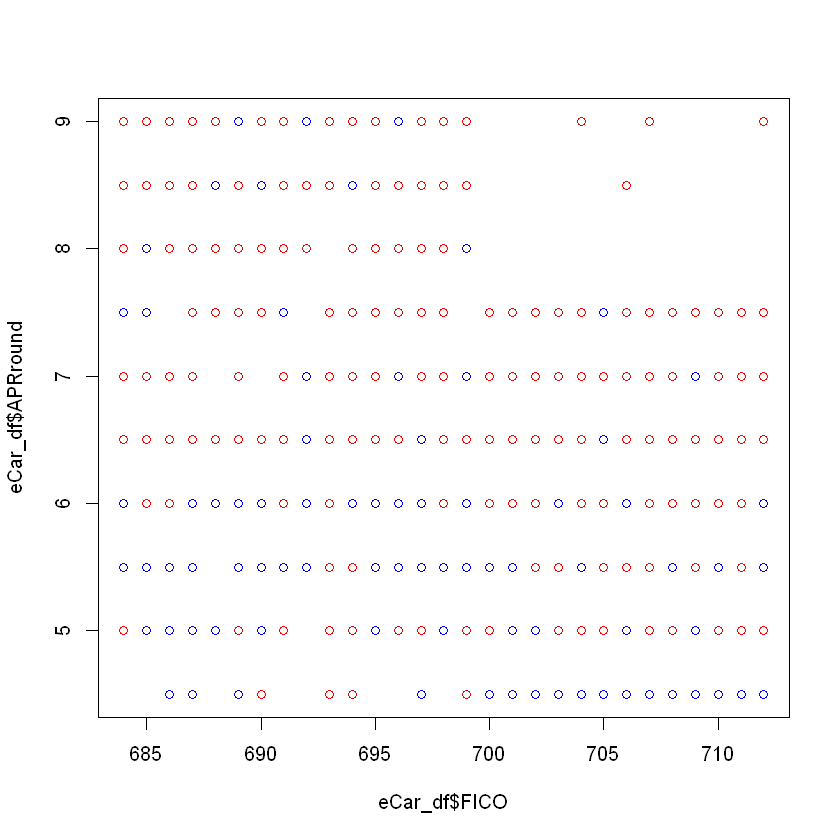

In [14]:
plot(eCar_df$FICO, eCar_df$APRround, col= ifelse(Accept >0,"blue","red"))

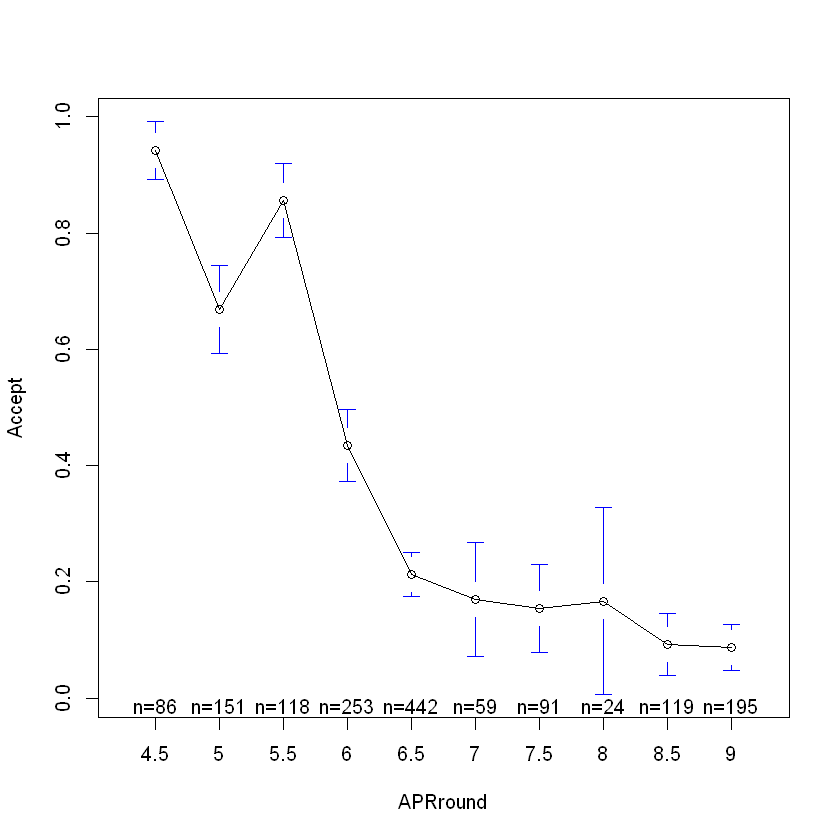

In [15]:
plotmeans(Accept ~ APRround, data = eCar_df)


Corremos una regresión lineal Accept=a+b⋅APR+ϵ

In [42]:
linear_model = lm(eCar_df$Accept ~ eCar_df$APR , data=eCar_df)
summary(linear_model)
sigma(linear_model)
mean(eCar_df$Accept)
sigma(linear_model)/mean(eCar_df$Accept)


Call:
lm(formula = eCar_df$Accept ~ eCar_df$APR, data = eCar_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72554 -0.38765 -0.00712  0.38331  1.04730 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.521961   0.054370   27.99   <2e-16 ***
eCar_df$APR -0.181418   0.008275  -21.92   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4174 on 1536 degrees of freedom
Multiple R-squared:  0.2383,	Adjusted R-squared:  0.2378 
F-statistic: 480.6 on 1 and 1536 DF,  p-value: < 2.2e-16


[1] 0.417369

[1] 0.3530559

[1] 1.182161

Corremos una regresión lineal Accept=a+b1⋅APR+b2⋅FICO+ϵ

In [43]:
linear_model_2 = lm(eCar_df$Accept ~ eCar_df$APR + eCar_df$FICO , data=eCar_df)
summary(linear_model_2)
sigma(linear_model_2)
mean(eCar_df$Accept)
sigma(linear_model_2)/mean(eCar_df$Accept)


Call:
lm(formula = eCar_df$Accept ~ eCar_df$APR + eCar_df$FICO, data = eCar_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85126 -0.36704 -0.02519  0.35268  1.10110 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.104869   0.991101   8.178 6.00e-16 ***
eCar_df$APR  -0.206282   0.008976 -22.981  < 2e-16 ***
eCar_df$FICO -0.009200   0.001383  -6.652 4.02e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4116 on 1535 degrees of freedom
Multiple R-squared:  0.2597,	Adjusted R-squared:  0.2587 
F-statistic: 269.2 on 2 and 1535 DF,  p-value: < 2.2e-16


[1] 0.4116148

[1] 0.3530559

[1] 1.165863

In [82]:
logit_model = glm(Accept ~ APR, data=eCar_df,family=binomial)
summary(logit_model)


Call:
glm(formula = Accept ~ APR, family = binomial, data = eCar_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8248  -0.8966  -0.2918   0.8761   2.6508  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.54415    0.42889   15.26   <2e-16 ***
APR         -1.15921    0.07118  -16.29   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1997.3  on 1537  degrees of freedom
Residual deviance: 1557.3  on 1536  degrees of freedom
AIC: 1561.3

Number of Fisher Scoring iterations: 5


In [46]:
xAPR = seq(3,8,0.1)
xAPR

[1] 3.0 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.0 4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8
[20] 4.9 5.0 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.0 6.1 6.2 6.3 6.4 6.5 6.6 6.7
[39] 6.8 6.9 7.0 7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.0

In [55]:
yhat = predict(logit_model, list(APR=xAPR),type="response")

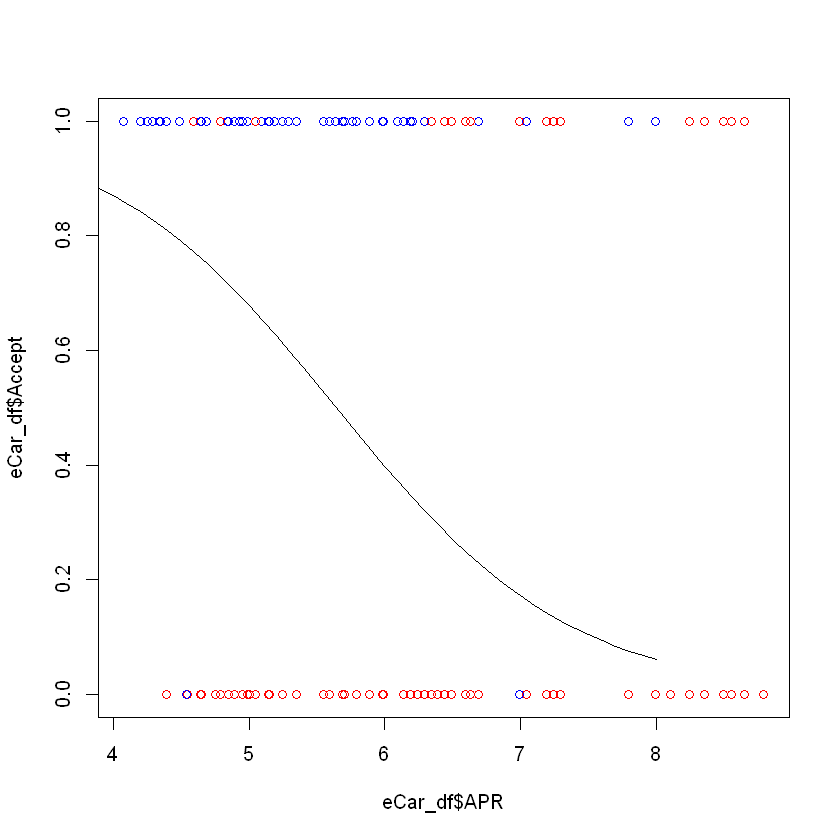

In [70]:
plot (eCar_df$APR, eCar_df$Accept, col= ifelse(Accept >0,"blue","red"))
lines (xAPR, yhat)

In [72]:
xAPRround = seq(4.25,8.75,0.5) # predict at the mid-value of each interval

In [73]:
yhat2 = predict(logit_model, list(APR=xAPRround),type="response")

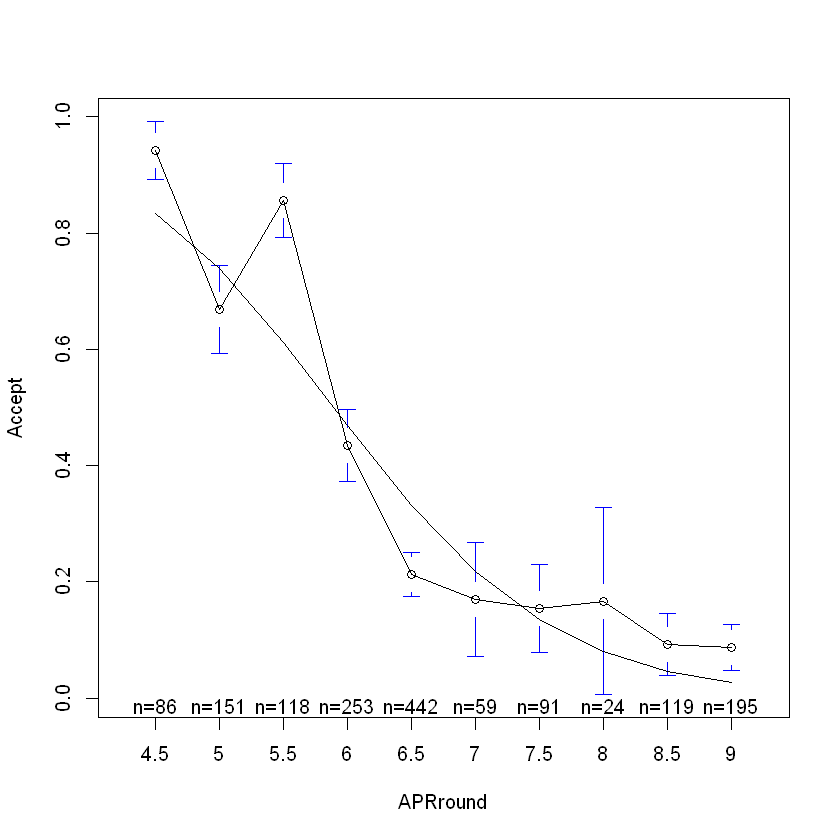

In [78]:
plotmeans(Accept ~ APRround, data = eCar_df)
lines(1:10,yhat2)

In [83]:
logit2_model = glm(Accept ~ APR + FICO + eCar_df$"Competition APR", data=eCar_df,family=binomial)
summary (logit2_model)


Call:
glm(formula = Accept ~ APR + FICO + eCar_df$"Competition APR", 
    family = binomial, data = eCar_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0464  -0.8630  -0.3078   0.8099   2.7513  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               36.851966   5.778573   6.377 1.80e-10 ***
APR                       -1.278104   0.074418 -17.175  < 2e-16 ***
FICO                      -0.044539   0.008072  -5.518 3.44e-08 ***
eCar_df$"Competition APR"  0.319419   0.171370   1.864   0.0623 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1997.3  on 1537  degrees of freedom
Residual deviance: 1523.8  on 1534  degrees of freedom
AIC: 1531.8

Number of Fisher Scoring iterations: 5


In [81]:
install
library(stargazer)

ERROR: Error in library(stargazer): there is no package called 'stargazer'


In [ ]:
stargazer(logit_model, logit2_model, type="text")